# CNN_UTK_Model for AgeRange 6 class classification using Augmentation2

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [7]:
len(df['age'].unique())

104

### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

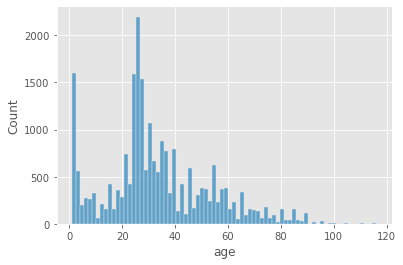

In [8]:
sns.histplot(data=df, x='age')

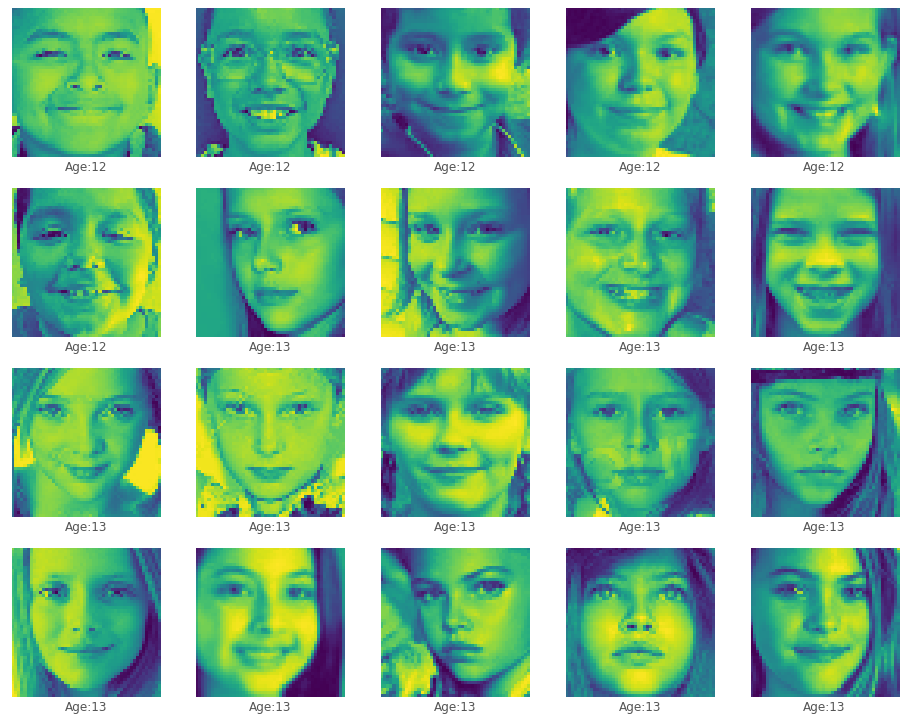

In [9]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [34]:
df = df.sample(frac=1)

In [35]:
X = np.array(df['pixels'].tolist())
# taking range of 5
y = df['age'] // 20

In [36]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [37]:
X = X.reshape(X.shape[0],48,48,1)

In [38]:
X[:5].shape

(5, 48, 48, 1)

In [39]:
y.unique()

array([2, 0, 1, 3, 4, 5], dtype=int64)

In [40]:
y = to_categorical(y, num_classes=6)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2, 
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=45,
    horizontal_flip = True) # randomly flipping half of the images horizontally

test_datagen = ImageDataGenerator()

### Model creation

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [44]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
Dropout(0.2)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
Dropout(0.4)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
Dropout(0.2)

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "mae"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

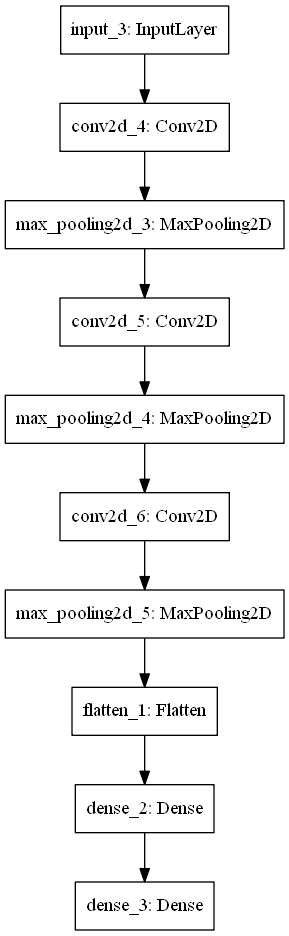

In [45]:
plot_model(model, to_file='models/cnn_utk_model_2_age-range-classification_6classes_augmentation2.png')

In [46]:
filepath = 'checkpoints/age_range_model2_classification_6classes_augmentation2.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [49]:
model.fit(train_datagen.flow(
        X_train, y_train,
        batch_size = 64
    ), epochs=50, steps_per_epoch=200, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/50
200/200 [==============================] - ETA: 0s - loss: 1.3049 - accuracy: 0.5008 - mae: 0.2207
Epoch 00001: val_loss improved from inf to 1.17537, saving model to checkpoints\age_range_model2_classification_6classes_augmentation2.epoch01-loss1.18.hdf5
200/200 [==============================] - 14s 71ms/step - loss: 1.3049 - accuracy: 0.5008 - mae: 0.2207 - val_loss: 1.1754 - val_accuracy: 0.5356 - val_mae: 0.2080
Epoch 2/50
200/200 [==============================] - ETA: 0s - loss: 1.1960 - accuracy: 0.5254 - mae: 0.2053
Epoch 00002: val_loss improved from 1.17537 to 1.16680, saving model to checkpoints\age_range_model2_classification_6classes_augmentation2.epoch02-loss1.17.hdf5
200/200 [==============================] - 16s 78ms/step - loss: 1.1960 - accuracy: 0.5254 - mae: 0.2053 - val_loss: 1.1668 - val_accuracy: 0.5192 - val_mae: 0.2018
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 1.1596 - accuracy: 0.5413 - mae: 0.2010
Epoch 00003: val_loss 

Epoch 22/50
200/200 [==============================] - ETA: 0s - loss: 0.8913 - accuracy: 0.6450 - mae: 0.1585
Epoch 00022: val_loss improved from 0.81910 to 0.80997, saving model to checkpoints\age_range_model2_classification_6classes_augmentation2.epoch22-loss0.81.hdf5
200/200 [==============================] - 20s 98ms/step - loss: 0.8913 - accuracy: 0.6450 - mae: 0.1585 - val_loss: 0.8100 - val_accuracy: 0.6786 - val_mae: 0.1414
Epoch 23/50
200/200 [==============================] - ETA: 0s - loss: 0.8818 - accuracy: 0.6496 - mae: 0.1563
Epoch 00023: val_loss improved from 0.80997 to 0.80639, saving model to checkpoints\age_range_model2_classification_6classes_augmentation2.epoch23-loss0.81.hdf5
200/200 [==============================] - 18s 91ms/step - loss: 0.8818 - accuracy: 0.6496 - mae: 0.1563 - val_loss: 0.8064 - val_accuracy: 0.6824 - val_mae: 0.1410
Epoch 24/50
200/200 [==============================] - ETA: 0s - loss: 0.8812 - accuracy: 0.6489 - mae: 0.1568
Epoch 00024: va

200/200 [==============================] - ETA: 0s - loss: 0.8072 - accuracy: 0.6766 - mae: 0.1446
Epoch 00044: val_loss did not improve from 0.74878
200/200 [==============================] - 18s 89ms/step - loss: 0.8072 - accuracy: 0.6766 - mae: 0.1446 - val_loss: 0.7619 - val_accuracy: 0.7001 - val_mae: 0.1377
Epoch 45/50
200/200 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.6780 - mae: 0.1455
Epoch 00045: val_loss improved from 0.74878 to 0.74489, saving model to checkpoints\age_range_model2_classification_6classes_augmentation2.epoch45-loss0.74.hdf5
200/200 [==============================] - 21s 105ms/step - loss: 0.8096 - accuracy: 0.6780 - mae: 0.1455 - val_loss: 0.7449 - val_accuracy: 0.7090 - val_mae: 0.1312
Epoch 46/50
200/200 [==============================] - ETA: 0s - loss: 0.7936 - accuracy: 0.6831 - mae: 0.1432
Epoch 00046: val_loss did not improve from 0.74489
200/200 [==============================] - 19s 95ms/step - loss: 0.7936 - accuracy: 0

<AxesSubplot:>

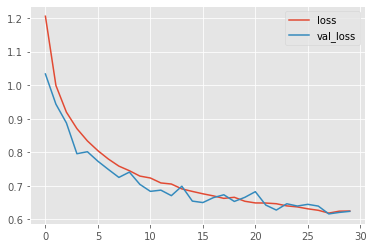

In [25]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [26]:
from tensorflow.math import argmax

In [27]:
y_pred = argmax(model.predict(X), axis=1)

In [28]:
np.array(y_pred).sum() / len(y_pred)

1.1692891794979963

Text(0.5, 1.0, 'Predicted vs Original')

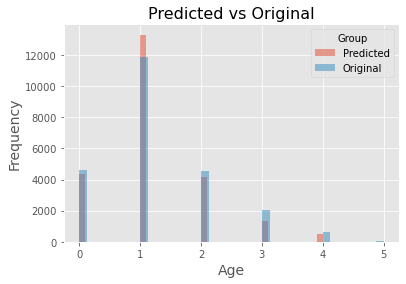

In [29]:
pd.Series((y_pred)).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
pd.Series(argmax(y, axis = 1)).plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

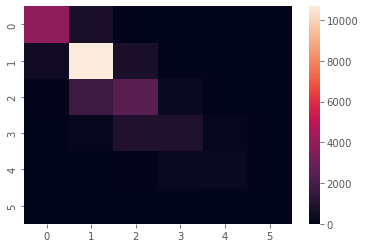

In [31]:
sns.heatmap(confusion_matrix(argmax(y, axis = 1), y_pred))

In [32]:
print(classification_report(argmax(y, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4593
           1       0.80      0.90      0.85     11880
           2       0.59      0.54      0.56      4544
           3       0.59      0.40      0.48      2015
           4       0.61      0.49      0.54       641
           5       0.00      0.00      0.00        32

    accuracy                           0.76     23705
   macro avg       0.58      0.53      0.55     23705
weighted avg       0.75      0.76      0.75     23705



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
y_pred.numpy()

array([0, 0, 0, ..., 2, 4, 3], dtype=int64)

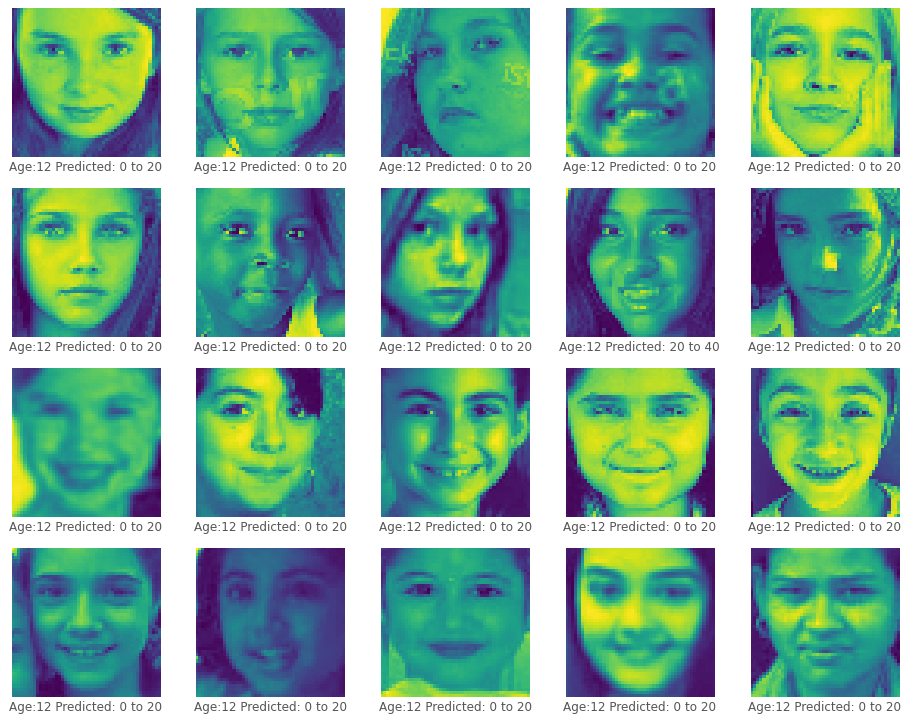

In [44]:
plt.figure(figsize=(16,16))
for i in range(1400,1420):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    pred_age = (20 * (y_pred.numpy()[i]))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(pred_age) + " to " + str(pred_age + 20))
plt.show()

### Predictions for best model

In [34]:
import os
path = os.getcwd() + r'\checkpoints\age_range_model2_classification_6classes_augmentation.epoch28-loss0.62.hdf5'

In [35]:
best_model = tf.keras.models.load_model(path)

In [36]:
y_pred_best = argmax(best_model.predict(X), axis=1)

Text(0.5, 1.0, 'Predicted vs Original')

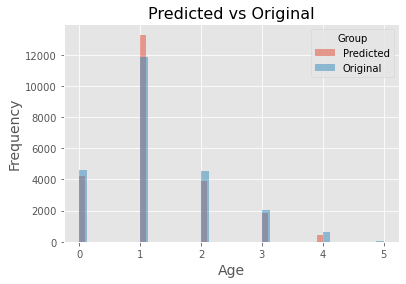

In [37]:
pd.Series((y_pred_best)).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
pd.Series(argmax(y, axis = 1)).plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

<AxesSubplot:>

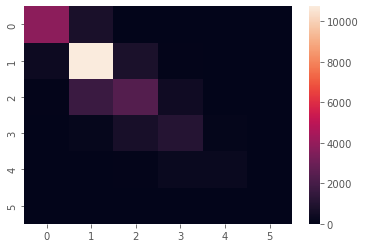

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(argmax(y, axis = 1), y_pred_best))

In [39]:
print(classification_report(argmax(y, axis = 1), y_pred_best))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4593
           1       0.81      0.90      0.85     11880
           2       0.61      0.52      0.56      4544
           3       0.57      0.52      0.55      2015
           4       0.64      0.44      0.52       641
           5       0.00      0.00      0.00        32

    accuracy                           0.77     23705
   macro avg       0.59      0.54      0.56     23705
weighted avg       0.76      0.77      0.76     23705



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


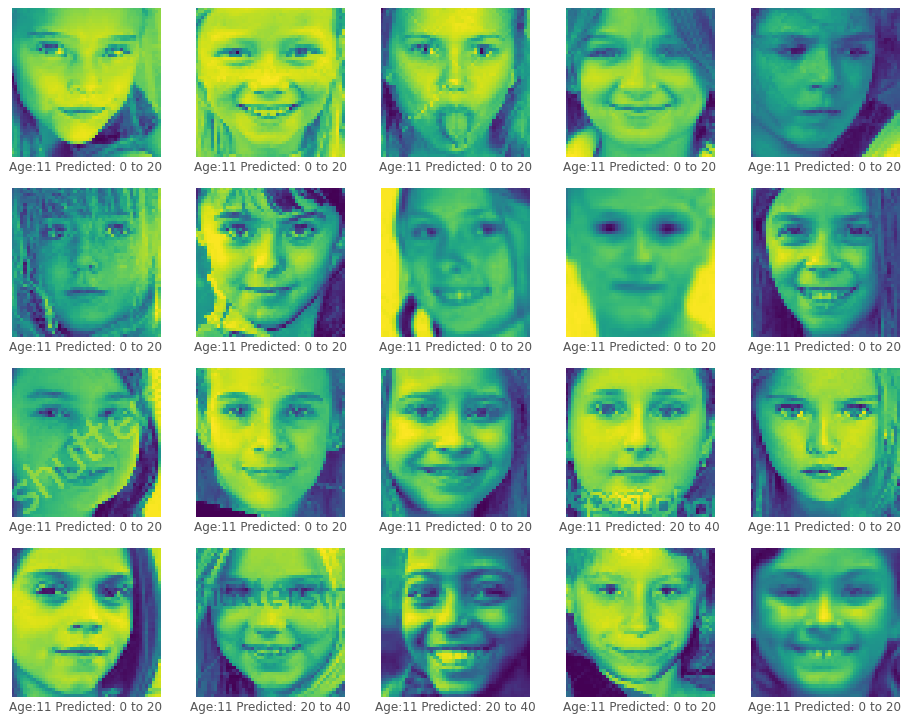

In [40]:
plt.figure(figsize=(16,16))
for i in range(1300,1320):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    pred_age = (20 * (y_pred_best.numpy()[i]))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(pred_age) + " to " + str(pred_age + 20))
plt.show()